# Project 2: Predicting Heart Disease with Classification Machine Learning Algorithms

## Table of Contents
#### 1. Introduction:
  - Scenario  
  - Goals 
  - Features & Predictor
  
#### 2. Data Wrangling
  - Importing Libraries
  - Loading Data
  - Renaming the columns
  - Basic Checks
  
#### 3. Exploratory Data Analysis
  - Checking Distribution
     - DistPlot
     - Histogram
  - Correlations
  - Heat Map
  - Pair Plot
  - CatPlot
  - Violin Plot
  - Scatter Plot
  - Checking Outliers
     - Box Plot 
  -  Filtering data by positive & negative Heart Disease patient
  
#### 4. Data processing
  - Transform the skewed data to normally distributed data
  - Label Encoding
  - Removing Outliers
  - One-Hot Encoding
  - Scaling Data
  
#### 5. Machine Learning + Predictive Analytics 
   - Modeling 
   - Splitting into Training and Test Data Set
   1. Logistic Regression 
   2. K-Nearest Neighbors
   3. Support Vector Machine 
   4. Decision Tree Classifier
   5. Random Forest Classifier
   6. XGBoosting Classifier
   
#### 6. Models Hyperparameter Tuning
   1. Logistic Regression 
   2. K-Nearest Neighbors
   3. Support Vector Machine 
   4. Decision Tree Classifier
   5. Random Forest Classifier
   6. XGBoosting Classifier
      ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍ ‍
#### 7. Conclusions

# 1. Introduction:
###  Scenario:
   predict whether certain patients have Heart Disease. We would like to make a Machine Learning algorithm where we can train our AI to learn & improve from experience. Thus, we would want to classify patients as either positive or negative for Heart Disease.
   
### Goal:
- Predict whether a patient should be diagnosed with Heart Disease. This is a binary outcome.
Positive (+) = 1, patient diagnosed with Heart Disease
Negative (-) = 0, patient not diagnosed with Heart Disease
- Experiment with various Classification Models & see which yields greatest accuracy.
- Examine trends & correlations within our data
- Determine which features are most important to Positive/Negative Heart Disease diagnosis

### Features & Predictor:
Our Predictor (Y, Positive or Negative diagnosis of Heart Disease) is determined by 13 features (X):

1. age (#)
2. sex : 1= Male, 0= Female (Binary)
3. (cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic
4. (bps) resting blood pressure (#)
5. (chol) serum cholesterol in mg/dl (#)
6. (fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)
7. (restECG) resting electrocardiography results(values 0,1,2)
8. (heart_rate) maximum heart rate achieved (#)
9. (exercise) exercise induced angina (binary) (1 = yes; 0 = no)
10. (oldpeak) = ST depression induced by exercise relative to rest (#)
11. (slope) of the peak exercise ST segment (Ordinal) (Value 1: up sloping , Value 2: flat , Value 3: down sloping )
12. (vessels) number of major vessels (0–3, Ordinal) colored by fluoroscopy
13. (thal) results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
##### Note: Our data has 3 types of data:
- Continuous (#): which is quantitative data that can be measured
- Ordinal Data: Categorical data that has a order to it (0,1,2,3, etc)
- Binary Data: data whose unit can take on only two possible states ( 0 &1 )

# 2. Data Wrangling

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [4]:
value = pd.read_csv("data/values.csv")
label = pd.read_csv("data/labels.csv")
label = label.iloc[:,1:]
data = pd.concat([value, label], axis=1)
data = data.iloc[:,1:]
data.head()


,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi


### Renaming the columns

In [6]:
data.rename(columns={'slope_of_peak_exercise_st_segment':'slope','resting_blood_pressure':'Bp','chest_pain_type':'cp',
                    'num_major_vessels':'vessels','fasting_blood_sugar_gt_120_mg_per_dl':'fbs','resting_ekg_results':'restECG',
                    'serum_cholesterol_mg_per_dl':'chol','oldpeak_eq_st_depression':'oldpeak','max_heart_rate_achieved':'heart_rate',
                    'exercise_induced_angina':'exercise'},
            inplace=True)

In [7]:
data.head(10)

,slope,thal,Bp,cp,vessels,fbs,restECG,chol,oldpeak,sex,age,heart_rate,exercise,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
5,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1
7,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,1
8,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1,1
9,2,normal,120,3,0,0,0,219,1.6,0,50,158,0,0


### Basic Checks

In [8]:
print("(Rows, columns): " + str(data.shape))
data.columns

(Rows, columns): (180, 14)


Index(['slope', 'thal', 'Bp', 'cp', 'vessels', 'fbs', 'restECG', 'chol',
       'oldpeak', 'sex', 'age', 'heart_rate', 'exercise',
       'heart_disease_present'],
      dtype='object')

In [9]:
data.nunique(axis=0)

slope                      3
thal                       3
Bp                        36
cp                         4
vessels                    4
fbs                        2
restECG                    3
chol                     118
oldpeak                   34
sex                        2
age                       40
heart_rate                73
exercise                   2
heart_disease_present      2
dtype: int64

In [10]:
print(data.isna().sum())

slope                    0
thal                     0
Bp                       0
cp                       0
vessels                  0
fbs                      0
restECG                  0
chol                     0
oldpeak                  0
sex                      0
age                      0
heart_rate               0
exercise                 0
heart_disease_present    0
dtype: int64


In [11]:
data.describe()

,slope,Bp,cp,vessels,fbs,restECG,chol,oldpeak,sex,age,heart_rate,exercise,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [12]:
data['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [13]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
        
print('categorical values :', categorical_val)
print('continous values : ', continous_val)

categorical values : ['slope', 'thal', 'cp', 'vessels', 'fbs', 'restECG', 'sex', 'exercise', 'heart_disease_present']
continous values :  ['Bp', 'chol', 'oldpeak', 'age', 'heart_rate']


# 3. Exploratory Data Analysis

### Checking Distribution



In [14]:
# creation of data frame which continuous variable

box= data[['age','Bp','chol','heart_rate','oldpeak']]

#### DISTPLOT

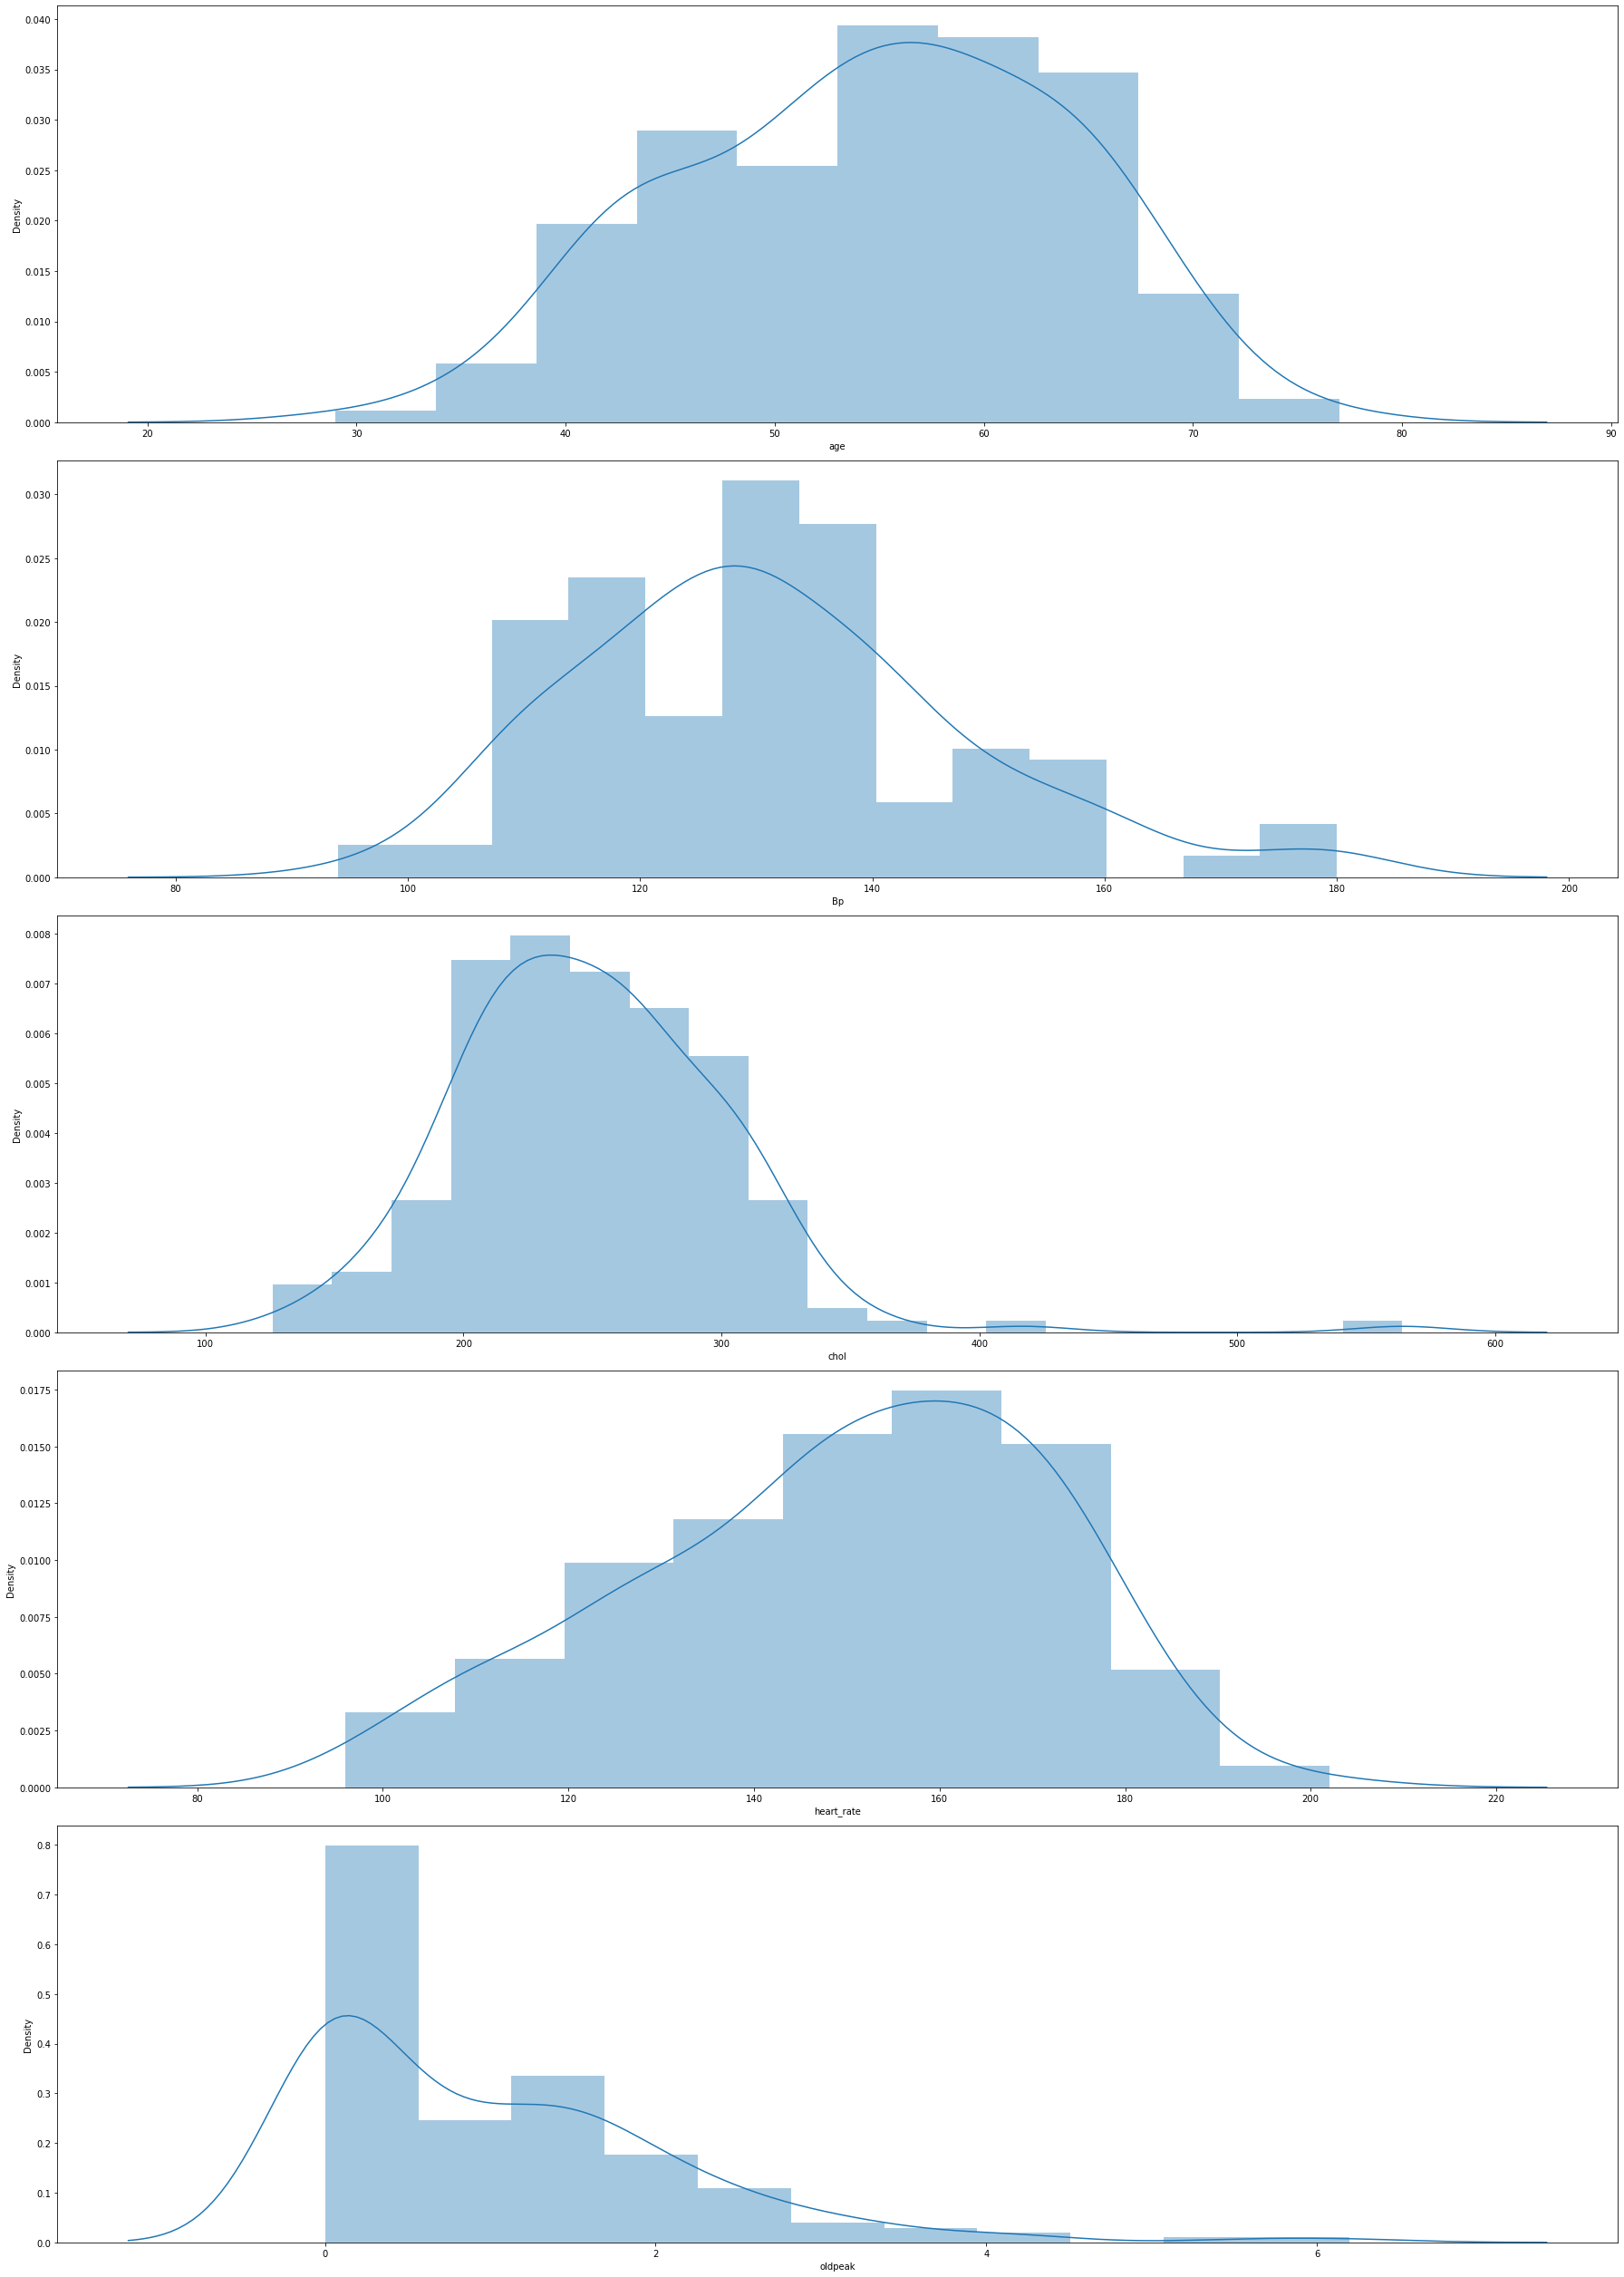

In [15]:

plt.figure(figsize=(25,35),facecolor='white')
plotnum=1
for c in box:
    if (plotnum<6):
        a=plt.subplot(5,1,plotnum)
        sns.distplot(box[c])
    plotnum+=1
plt.tight_layout() 

#### HISTOGRAM

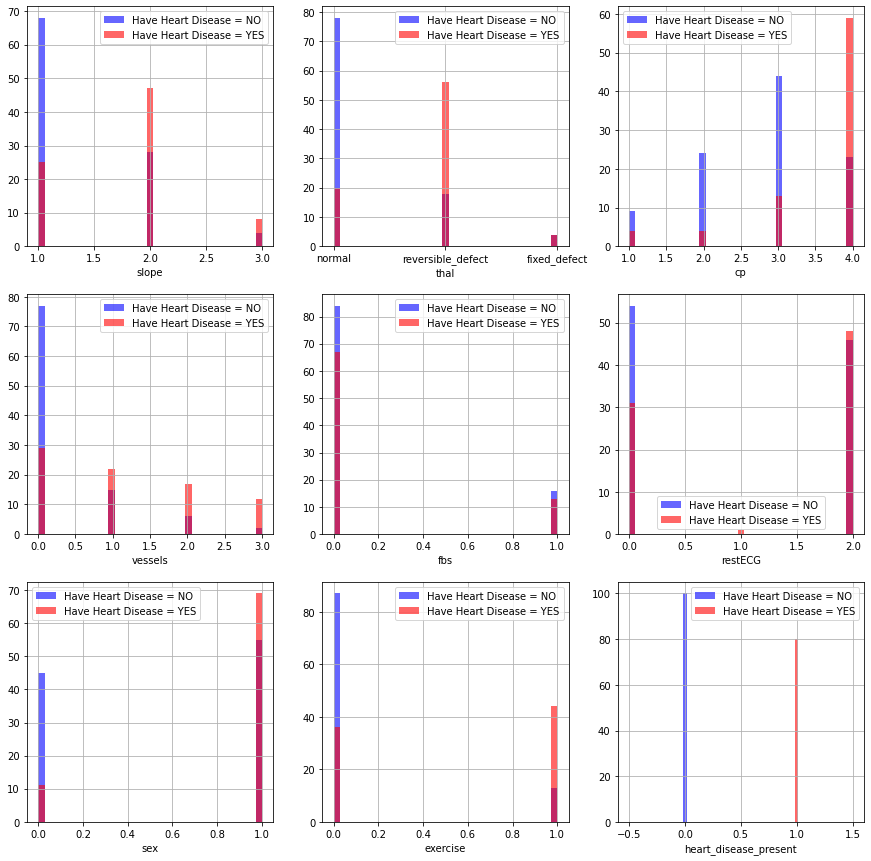

In [16]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["heart_disease_present"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["heart_disease_present"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# Notes 
- slope:(peak exercise ST segment) People with slope value equal to 2 are more likely to have heart disease than people with slope value equal to 1 or 3 
- thal:(maximum heart rate achieved)  People with thal reversible_defect are more likely to have heart disease.
- cp:(chest pain) People with cp equal to 4 are more likely to have heart disease than other people.
- vessel:(number of major vessels(0-3)colored by flourosopy) the more blood movement the better so people with vessel equal to 0 are more not likely to have heart disease.
- restECG:(resting electrocardiography results) People with value 0 are more not likely to have heart disease.
- exercise: (exercise induced angina) People with value 0 have no heart disease.
- sex : male are more likely to have heart disease than female
- fbs:  People with fasting_blood_sugar_gt_120_mg_per_dl and without fasting_blood_sugar_gt_120_mg_per_dl have the same chance of getting heart disease. So fasting_blood_sugar_gt_120_mg_per_dl does not make any sense in heart disease prediction

# Correlations
 Let’s see correlations between all variables.

#### HEATMAP

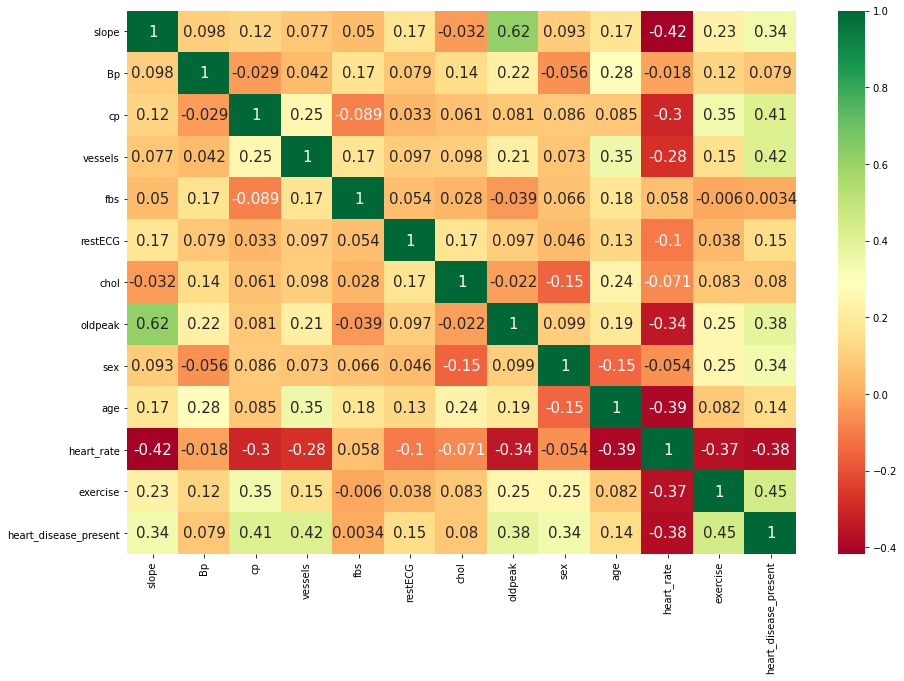

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

- No correlation between independent variable and target variable.

<AxesSubplot:title={'center':'correlation with heart_disease_present '}, xlabel='Numerical Features', ylabel='Correlation'>

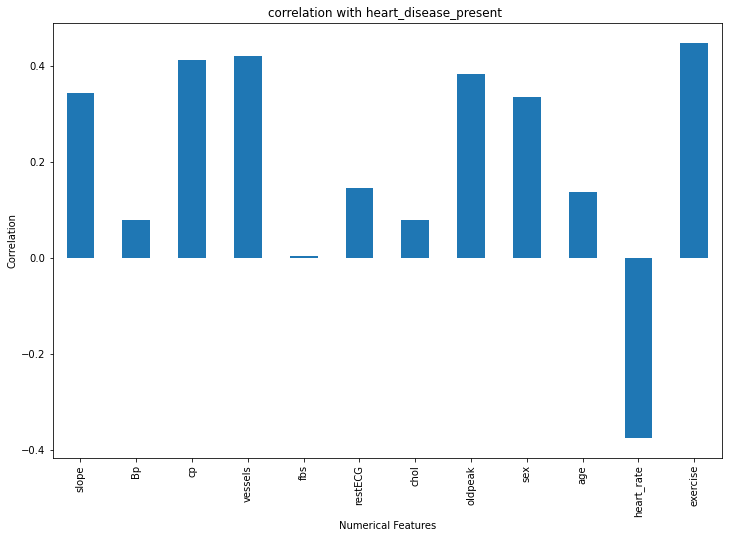

In [18]:
data.drop('heart_disease_present',axis=1).corrwith(data.heart_disease_present).plot(kind='bar',figsize=(12,8),
                                                                                      ylabel='Correlation', xlabel='Numerical Features',title="correlation with heart_disease_present ")

#### PAIRPLOT

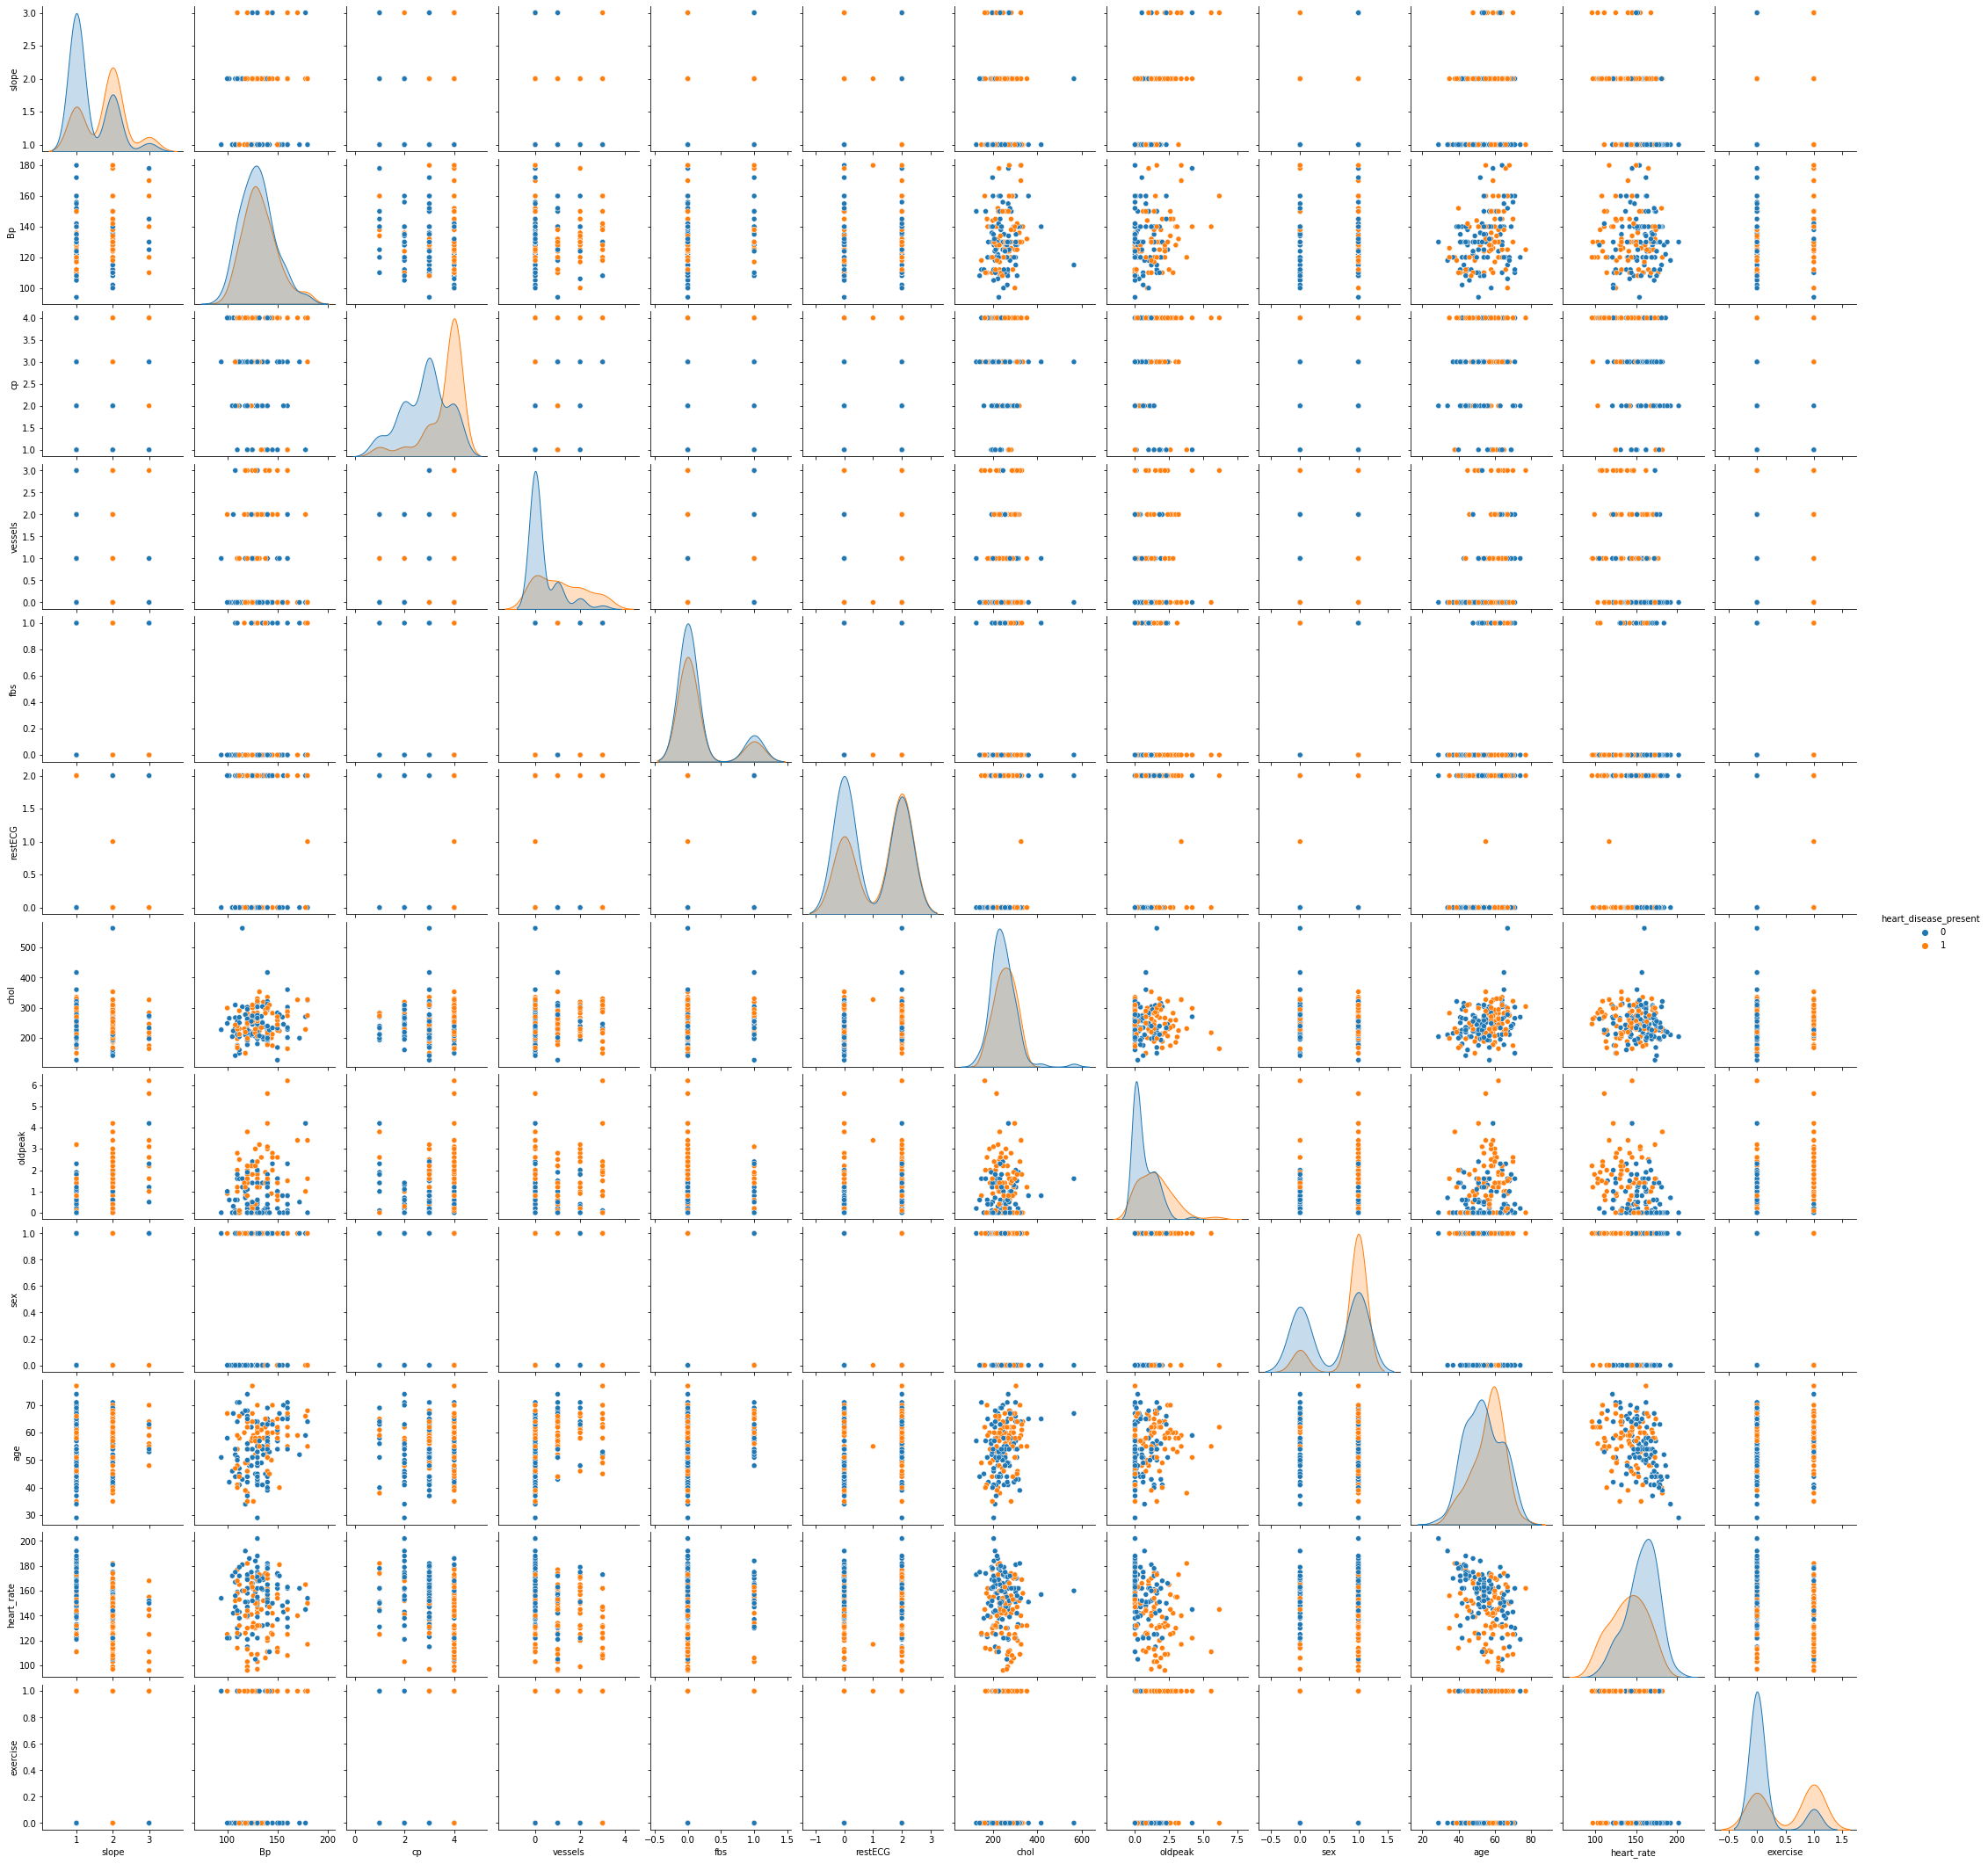

In [19]:

sns.pairplot(data, hue="heart_disease_present")
#plt.savefig('pairplot.png')
plt.show()

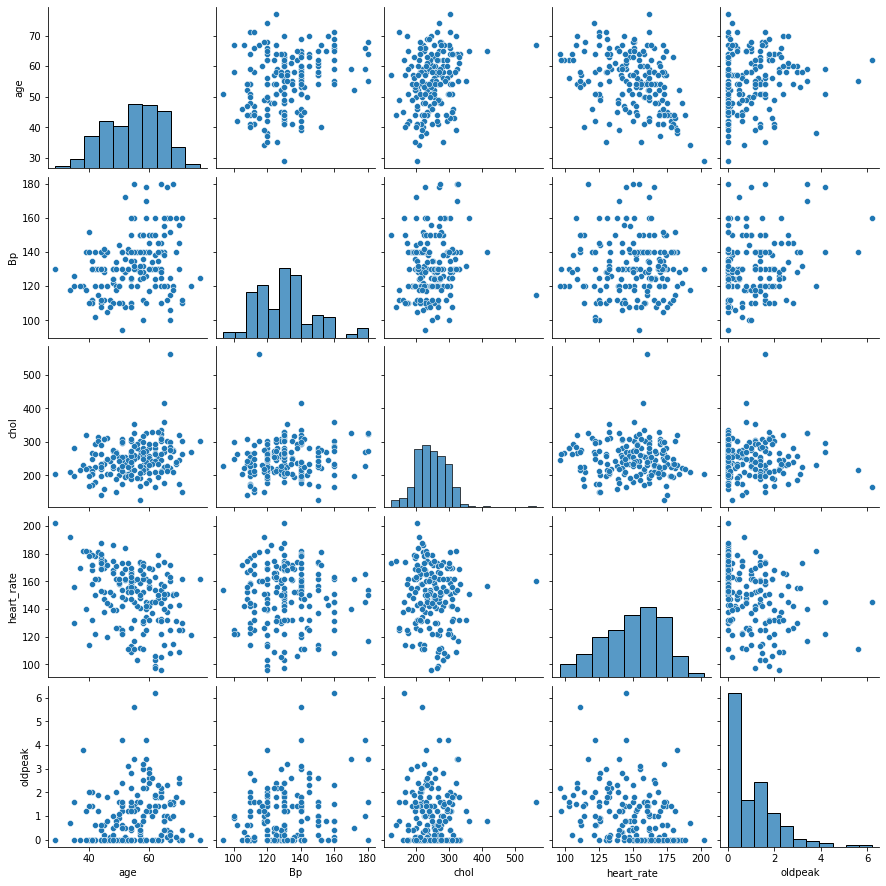

In [20]:
# pairplot with only continuous features

subData = data[['age','Bp','chol','heart_rate','oldpeak']]
sns.pairplot(subData)

#### CATPLOT

Text(9.645598958333334, 0.5, 'ST depression')

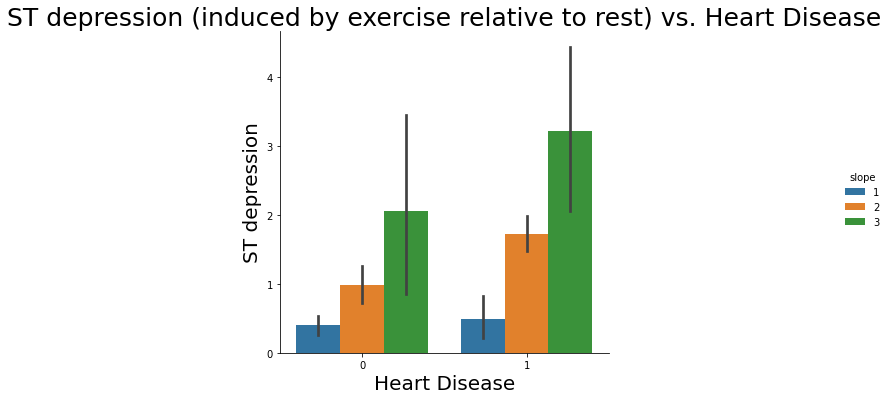

In [21]:
sns.catplot(x="heart_disease_present", y="oldpeak", hue="slope", kind="bar", data=data);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

#### VIOLIN PLOT

Text(0, 0.5, 'heart_rate')

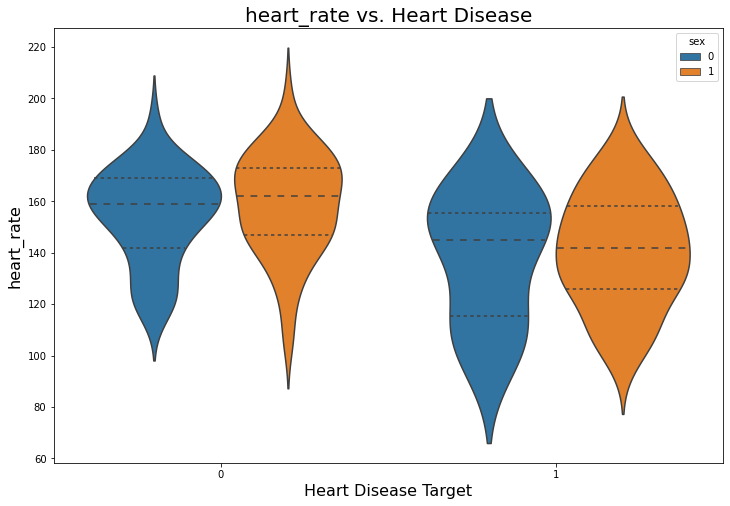

In [22]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'heart_disease_present', y= 'heart_rate',hue="sex", inner='quartile',data= data )
plt.title("heart_rate vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("heart_rate", fontsize=16)

#### SCATTER PLOT

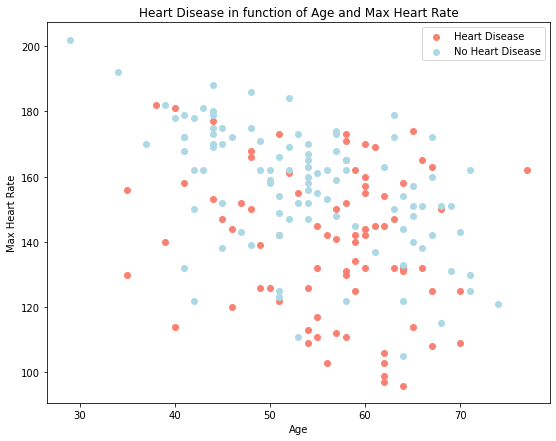

In [23]:
# Age vs. Max Heart Rate for Heart Disease

plt.figure(figsize=(9, 7))

plt.scatter(data.age[data.heart_disease_present==1],
            data.heart_rate[data.heart_disease_present==1],
            c="salmon")

plt.scatter(data.age[data.heart_disease_present==0],
            data.heart_rate[data.heart_disease_present==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease ", "No Heart Disease"]);

# Checking Outliers & Use Median

#### BOX PLOT

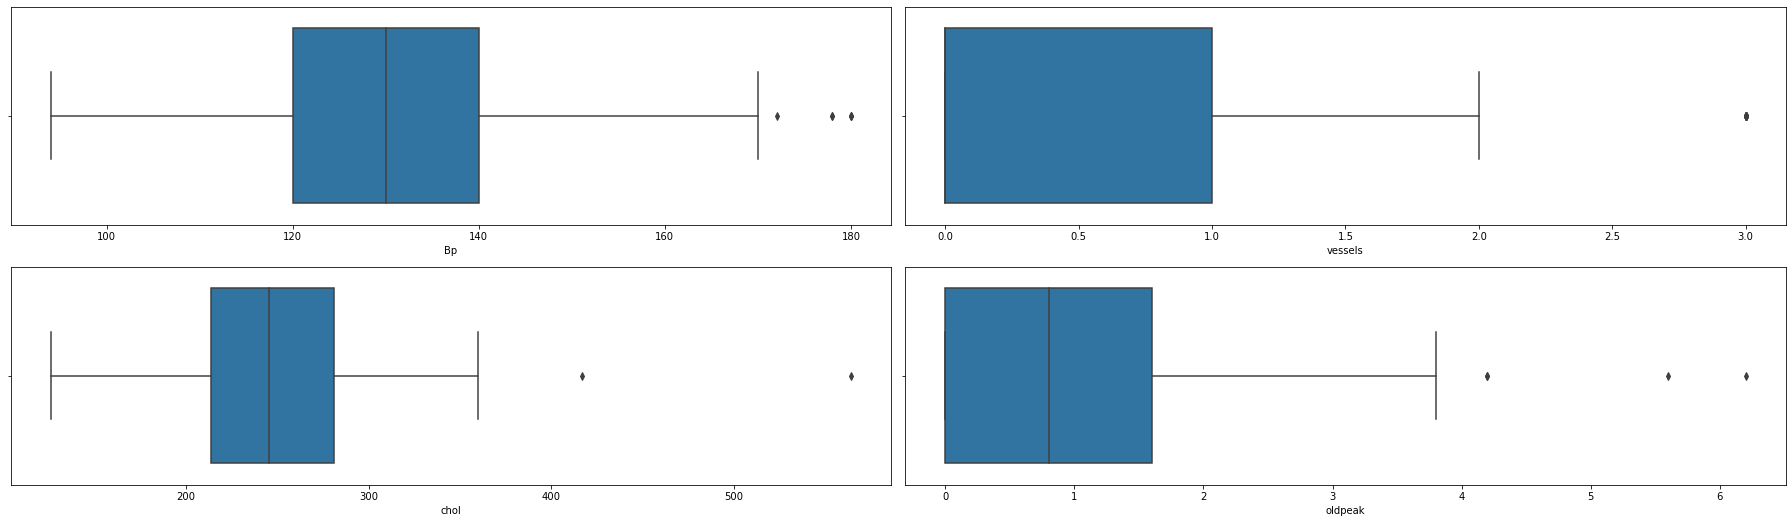

In [25]:
# Outliers
box1=data[['Bp','vessels','chol','oldpeak']]

plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in box1:
    if(plotnum<14):
        ax=plt.subplot(7,2,plotnum)
        sns.boxplot(box1[c])
    plotnum+=1
plt.tight_layout() 

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

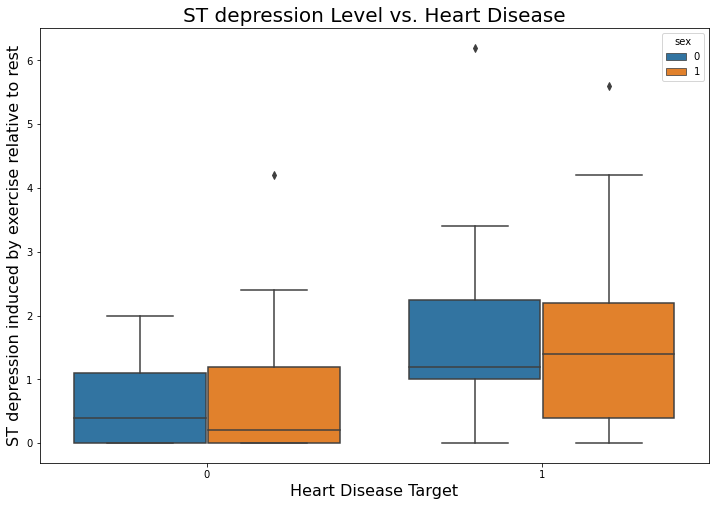

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'heart_disease_present', y= 'oldpeak',hue="sex", data=data )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

In [27]:
#resting_blood_pressure
IQR = stats.iqr(data.Bp, interpolation = 'midpoint')
IQR

20.0

In [28]:
Q1=data.Bp.quantile(0.25)
Q3=data.Bp.quantile(0.75)
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

print('minimun limit :', min_limit)
print('maximum limit :', max_limit)

minimun limit : 90.0
maximum limit : 170.0


In [29]:
data.loc[data['Bp']>max_limit]

,slope,thal,Bp,cp,vessels,fbs,restECG,chol,oldpeak,sex,age,heart_rate,exercise,heart_disease_present
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
33,1,normal,180,4,0,0,0,325,0.0,0,64,154,1,0
72,1,reversible_defect,172,3,0,1,0,199,0.5,1,52,162,0,0
75,2,reversible_defect,178,4,2,1,0,228,1.0,0,66,165,1,1
113,2,reversible_defect,180,3,0,1,2,274,1.6,1,68,150,1,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1


In [30]:
data.shape

(180, 14)

In [31]:
data.loc[data['Bp']>max_limit,'Bp']=np.median(data.Bp)

In [32]:
data.loc[data['Bp']>max_limit]

,slope,thal,Bp,cp,vessels,fbs,restECG,chol,oldpeak,sex,age,heart_rate,exercise,heart_disease_present


In [33]:
#serum_cholesterol_mg_per_dl
IQR = stats.iqr(data.chol, interpolation = 'midpoint')
IQR

68.0

In [34]:
Q1=data.chol.quantile(0.25)
Q3=data.chol.quantile(0.75)
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

print('minimun limit :', min_limit)
print('maximum limit :', max_limit)

minimun limit : 111.75
maximum limit : 383.25


In [35]:
data.loc[data['chol']>max_limit]

,slope,thal,Bp,cp,vessels,fbs,restECG,chol,oldpeak,sex,age,heart_rate,exercise,heart_disease_present
43,1,normal,140.0,3,1,1,2,417,0.8,0,65,157,0,0
60,2,reversible_defect,115.0,3,0,0,2,564,1.6,0,67,160,0,0


In [37]:
data.loc[data['chol']>max_limit,'chol']=np.median(data.chol)

In [38]:
data.loc[data['chol']>max_limit]

,slope,thal,Bp,cp,vessels,fbs,restECG,chol,oldpeak,sex,age,heart_rate,exercise,heart_disease_present


In [39]:
#oldpeak_eq_st_depression
IQR=stats.iqr(data.oldpeak, interpolation='midpoint')
IQR

1.6

In [40]:
Q1=data.oldpeak.quantile(.25)
Q3=data.oldpeak.quantile(.75)
min_limit =Q1-1.5*IQR
max_limit=Q3+1.5*IQR

print('minimun limit :', min_limit)
print('maximum limit :', max_limit)

minimun limit : -2.4000000000000004
maximum limit : 4.0


In [41]:
data.loc[data['oldpeak']>max_limit]

,slope,thal,Bp,cp,vessels,fbs,restECG,chol,oldpeak,sex,age,heart_rate,exercise,heart_disease_present
4,3,reversible_defect,130.0,1,0,0,2,270.0,4.2,1,59,145,0,0
112,2,reversible_defect,140.0,4,3,0,0,298.0,4.2,1,51,122,1,1
140,3,reversible_defect,140.0,4,0,0,0,217.0,5.6,1,55,111,1,1
162,3,reversible_defect,160.0,4,3,0,2,164.0,6.2,0,62,145,0,1


In [42]:
data.loc[data['oldpeak']>max_limit,'oldpeak']=np.median(data.oldpeak)

In [43]:
data.loc[data['oldpeak']>max_limit]

,slope,thal,Bp,cp,vessels,fbs,restECG,chol,oldpeak,sex,age,heart_rate,exercise,heart_disease_present


In [45]:
data.shape

(180, 14)

## Filtering Data by Positive & Negative Heart Disease Patient

In [46]:
# Filtering data by POSITIVE Heart Disease patient
pos_data = data[data['heart_disease_present']==1]
pos_data.describe()

,slope,Bp,cp,vessels,fbs,restECG,chol,oldpeak,sex,age,heart_rate,exercise,heart_disease_present
count,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.0
mean,1.787500,130.950000,3.58750,1.150000,0.162500,1.212500,253.90000,1.318750,0.862500,56.250000,140.250000,0.550000,1.0
std,0.609913,14.224155,0.80652,1.080319,0.371236,0.976869,46.73074,1.026003,0.346547,8.619231,22.161376,0.500633,0.0
min,1.000000,100.000000,1.00000,0.000000,0.000000,0.000000,149.00000,0.000000,0.000000,35.000000,96.000000,0.000000,1.0
25%,1.000000,120.000000,3.00000,0.000000,0.000000,0.000000,222.00000,0.475000,1.000000,51.000000,125.000000,0.000000,1.0
50%,2.000000,130.000000,4.00000,1.000000,0.000000,2.000000,255.50000,1.200000,1.000000,58.000000,142.000000,1.000000,1.0
75%,2.000000,140.000000,4.00000,2.000000,0.000000,2.000000,289.25000,2.000000,1.000000,62.000000,157.250000,1.000000,1.0
max,3.000000,170.000000,4.00000,3.000000,1.000000,2.000000,353.00000,3.800000,1.000000,77.000000,182.000000,1.000000,1.0


In [47]:
# Filtering data by NEGATIVE Heart Disease patient
neg_data = data[data['heart_disease_present']==0]
neg_data.describe()

,slope,Bp,cp,vessels,fbs,restECG,chol,oldpeak,sex,age,heart_rate,exercise,heart_disease_present
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00,100.000000,100.000000,100.000000,100.0
mean,1.360000,128.720000,2.810000,0.330000,0.160000,0.920000,240.560000,0.59300,0.55,53.660000,156.870000,0.130000,0.0
std,0.559942,14.911239,0.895499,0.682464,0.368453,1.001817,43.634865,0.70155,0.50,9.759968,19.085483,0.337998,0.0
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.00000,0.00,29.000000,105.000000,0.000000,0.0
25%,1.000000,120.000000,2.000000,0.000000,0.000000,0.000000,210.750000,0.00000,0.00,45.000000,146.500000,0.000000,0.0
50%,1.000000,130.000000,3.000000,0.000000,0.000000,0.000000,237.500000,0.25000,1.00,53.500000,160.000000,0.000000,0.0
75%,2.000000,140.000000,3.000000,0.000000,0.000000,2.000000,268.250000,1.12500,1.00,63.000000,171.250000,0.000000,0.0
max,3.000000,160.000000,4.000000,3.000000,1.000000,2.000000,360.000000,2.40000,1.00,74.000000,202.000000,1.000000,0.0


# 4. Data Processing For Model

#### Label Encoding  

In [52]:
columns=data.select_dtypes(include=['object']).columns
print(columns)
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data[columns]=data[columns].apply(le.fit_transform)
data.head(10)
data.shape

Index(['thal'], dtype='object')


(180, 14)

#### Splitting into Training and Test Data Set

In [56]:
from sklearn.model_selection import train_test_split

X = data.drop('heart_disease_present', axis=1)
y = data.heart_disease_present

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape

(144, 13)

## Feature selection

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [59]:
print(model.feature_importances_)

[0.06886644 0.13792513 0.06350283 0.11202368 0.1112775  0.02260937
 0.03687565 0.06300363 0.08191116 0.05589983 0.06928488 0.07391264
 0.10290726]


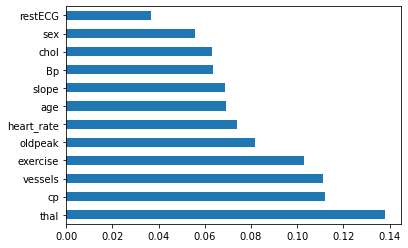

In [60]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

### Scaled data

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled = ["cp", "Bp", "chol", "oldpeak", "age", "heart_rate"]
X_train[scaled] = sc.fit_transform(X_train[scaled])
X_test[scaled] = sc.transform(X_test[scaled])

# 5. Machine Learning + Predictive Analytics 

In [64]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  

In [65]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [0.1, 0.5, 1, 2, 5, 10, 20],
            'kernel': ['rbf','linear'],
            "gamma": [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1, 1000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'K_neareast': {
    'model': KNeighborsClassifier(),
    'params': {
        "n_neighbors" :[2,3,4,5,6]
    }
    },

    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            "criterion":("gini", "entropy"), 
        } 
    },
    'XGBOOST': {
        'model': XGBClassifier(),
        'params': {
            
        } 
    }
        
}

In [66]:
scores = []

for model_name, mp in model_params.items():
    model = mp["model"].fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'Train_accuracy %': accuracy_score(y_train, model.predict(X_train))*100,
        'Test_accuracy %': accuracy_score(y_test, model.predict(X_test))*100,
        'Precision_score %': precision_score(y_test, model.predict(X_test))*100,
        'Recall %': recall_score(y_test, model.predict(X_test))*100,
        'F1_score %': f1_score(y_test, model.predict(X_test))*100,
        'confusion_matrix': confusion_matrix(y_test, model.predict(X_test)),
        
    })
    

df = pd.DataFrame(scores,columns=['model','Train_accuracy %','Test_accuracy %', "Precision_score %", 'Recall %', 'F1_score %', 'confusion_matrix' ])
df

[02:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,Train_accuracy %,Test_accuracy %,Precision_score %,Recall %,F1_score %,confusion_matrix
0,svm,89.583333,83.333333,100.000000,70.0,82.352941,"[[16, 0], [6, 14]]"
1,random_forest,100.000000,86.111111,100.000000,75.0,85.714286,"[[16, 0], [5, 15]]"
2,logistic_regression,88.194444,83.333333,88.888889,80.0,84.210526,"[[14, 2], [4, 16]]"
3,naive_bayes,86.805556,80.555556,100.000000,65.0,78.787879,"[[16, 0], [7, 13]]"
4,K_neareast,85.416667,77.777778,92.857143,65.0,76.470588,"[[15, 1], [7, 13]]"
5,decision_tree,100.000000,80.555556,93.333333,70.0,80.000000,"[[15, 1], [6, 14]]"
6,XGBOOST,100.000000,83.333333,93.750000,75.0,83.333333,"[[15, 1], [5, 15]]"


#  Hyper Tune Model 

In [67]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [0.1, 0.5, 1, 2, 5, 10, 20],
            'kernel': ['rbf','linear', "poly"],
            "gamma": [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,23,12,12,3,4], 
            'max_features': ['auto', 'sqrt','log2'],
            'max_depth': (list(range(1, 3))), 
            'min_samples_split': [2, 5, 3],
            'min_samples_leaf': [1, 2, 3]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            "C": np.logspace(-4, 10, 20)
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'K_neareast': {
    'model': KNeighborsClassifier(),
    'params': {
        "n_neighbors" :[2,3,4,5,6]
    }
    },

    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            "criterion":("gini", "entropy"), 
            "splitter":("best", "random"), 
            "max_depth":(list(range(1, 3))), 
            "min_samples_split":[2,5,3], 
            "min_samples_leaf":list(range(1, 3))
        } 
    },
    'XGBOOST': {
        'model': XGBClassifier(),
        'params': {
            "n_estimators": [10, 20, 30 , 40, 50, 60, 90, 100],
            "max_depth" :[2,3,4,5,6],
            "learning_rate": [0.1,0.2,0.3]
            
        } 
    }
        
}

In [135]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'Train_accuracy %': accuracy_score(y_train, clf.predict(X_train))*100,
        'Test_accuracy %': clf.best_score_*100,
        "Best_perameters": clf.best_params_
    })
    
    
df = pd.DataFrame(scores,columns=['model','Train_accuracy %','Test_accuracy %', "Best_perameters"])
df

[01:30:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:30:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[01:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model,Train_accuracy %,Test_accuracy %,Best_perameters
0,svm,85.416667,85.428571,"{'C': 20, 'gamma': 0.001, 'kernel': 'rbf'}"
1,random_forest,88.194444,84.809524,"{'max_depth': 2, 'max_features': 'sqrt', 'min_..."
2,logistic_regression,86.805556,84.047619,{'C': 2.6366508987303554}
3,naive_bayes,86.805556,83.333333,{}
4,K_neareast,83.333333,79.142857,{'n_neighbors': 6}
5,decision_tree,79.861111,79.857143,"{'criterion': 'entropy', 'max_depth': 2, 'min_..."
6,XGBOOST,98.611111,84.809524,"{'learning_rate': 0.2, 'max_depth': 6, 'n_esti..."


# Support vector machine using for Singe prediction

In [70]:
svm_clf = SVC(kernel='rbf', gamma=0.001, C=20)
svm_clf.fit(X_train, y_train)

SVC(C=20, gamma=0.001)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



In [75]:
New_data =[[2,1,156,3,1,1,2,308,1.6,1,54,168,1]]
column = X_train.columns
data_new = pd.DataFrame(data = New_data, columns= column)
data_new[scaled] = sc.transform(data_new[scaled])
result = svm_clf.predict(data_new)

if result == 0:
    print("Negative")
else:
    print("Positive")

Positive


# Conclusion 